<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


------------------------------------------------------------------------------------------

BOX PLOT FOR MEDIAN VALUE OF OWNER OCCUPIED HOMES

Text(0.5, 0, 'Median value in $1000')

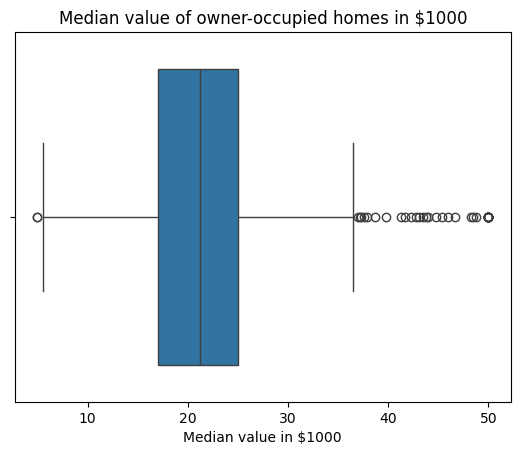

In [7]:
ax = sns.boxplot(x = 'MEDV', data = boston_df)
ax.set_title("Median value of owner-occupied homes in $1000")
ax.set_xlabel('Median value in $1000')

The following graph indicates that the median value is mostly centered around in the 17,000 - 25,000 range with outliers spanning upto 50,000. 

-------

BARPLOT FOR THE CHARLES RIVER VARIABLE

Text(0, 0.5, 'Value in $1000')

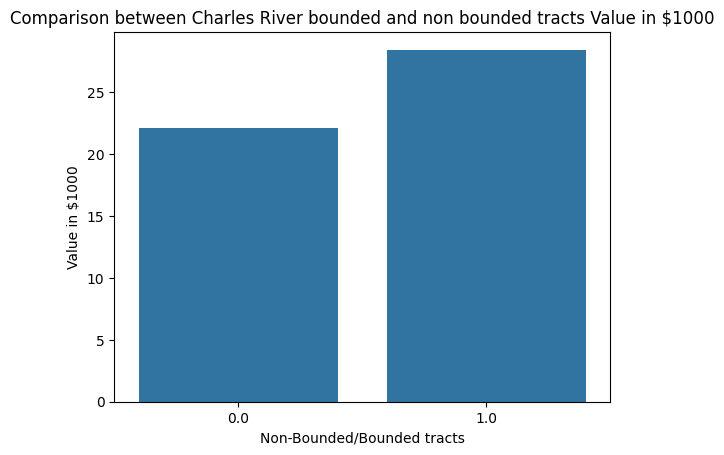

In [8]:
CHAS_div = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
ax = sns.barplot(x = 'CHAS', y = 'MEDV', data = CHAS_div)
ax.set_title("Comparison between Charles River bounded and non bounded tracts Value in $1000")
ax.set_xlabel("Non-Bounded/Bounded tracts")
ax.set_ylabel("Value in $1000")

The barplot clearly shows that the value of houses bounded by Charles river is more then that of the houses not bounded by the river. 

---------

BOXPLOT FOR THE MEDV VARIABLE VS THE AGE VARIABLE

In [23]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 years and less" 
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df["AGE"] < 75), 'age_group'] = "35-75 years"
boston_df.loc[(boston_df['AGE'] >= 75), 'age_group'] = "75 years and older"

Text(0, 0.5, 'Median value of owner occupied houses')

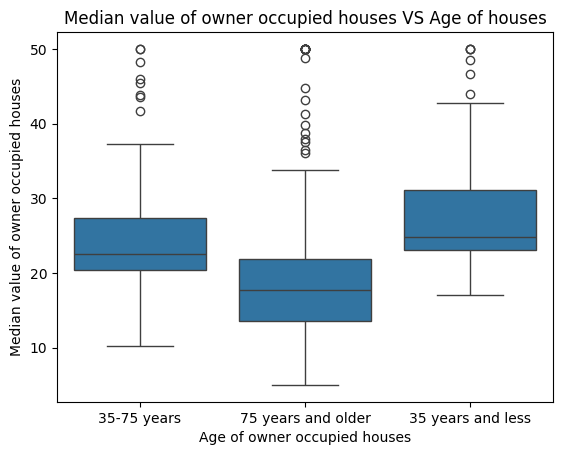

In [24]:
ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
ax.set_title("Median value of owner occupied houses VS Age of houses")
ax.set_xlabel("Age of owner occupied houses")
ax.set_ylabel("Median value of owner occupied houses")

Newer houses built whithin past 35 years have more median value then that of houses older then 35 years. The graph also describes that most houses which are more then 75 years old have the least value.

---------

SCATTERPLOT SHOWING THE RELATIONSHIP BETWEEN NITRIC ACID CONC AND PROPORTION OF NON-RETAIL BUSINESS ACRES PER TOWN 

Text(0, 0.5, 'Nitric Oxide concentration')

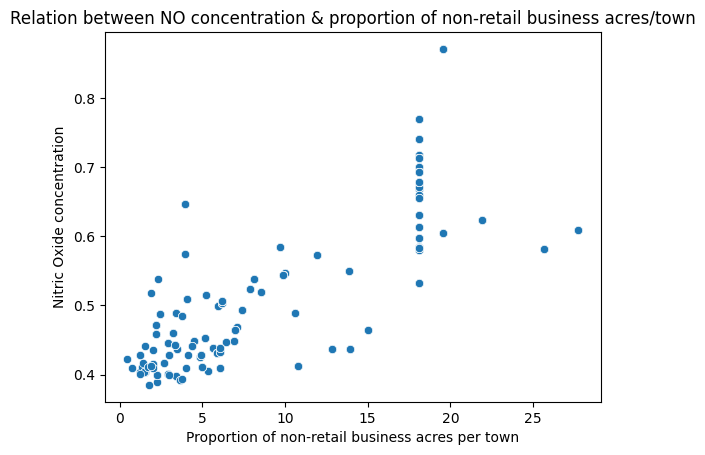

In [11]:
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
ax.set_title("Relation between NO concentration & proportion of non-retail business acres/town")
ax.set_xlabel("Proportion of non-retail business acres per town")
ax.set_ylabel("Nitric Oxide concentration")

The plot generally suggests a positive correlation between the proportion of non-retail business acres per town and nitric oxide concentration

------

HISTOGRAM FOR THE PUPIL TO TEACHER RATIO

Text(0, 0.5, 'Count')

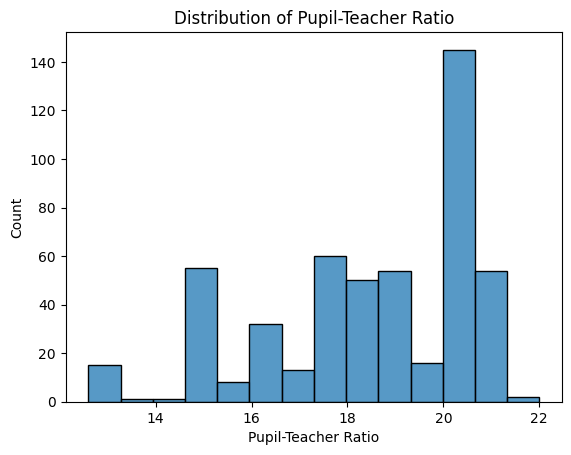

In [12]:
ax = sns.histplot(x = 'PTRATIO', data = boston_df)
ax.set_title('Distribution of Pupil-Teacher Ratio')
ax.set_xlabel('Pupil-Teacher Ratio')
ax.set_ylabel('Count')

the distribution suggests that the pupil to teacher ratio of 20 is most common with other regions having low pupil to teacher ratio

----

USING THE T-TEST TO FIND IF THERE IS SIGNIFICANT DIFFERENCE IN MEDIAN VALUE OF HOUSES BOUNDED BY CHARLES RIVER OR NOT?


Stating the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by charles river")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by charles river")



In [13]:
boston_df.loc[(boston_df['CHAS'] == 1), 'CBS'] = "Bounded" 
boston_df.loc[(boston_df['CHAS'] == 0), 'CBS'] = "Notbounded"

In [14]:
scipy.stats.levene(boston_df[boston_df['CBS'] == 'Bounded']['MEDV'], boston_df[boston_df['CBS'] == 'Notbounded']['MEDV'],center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CBS'] == 'Bounded']['MEDV'], boston_df[boston_df['CBS'] == 'Notbounded']['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since p-value is less then 0.05, we reject the null hypothesis of a difference in median  value of houses bounded by charles river 

---------

Using ANOVA to find if there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Stating the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
* $H_1:$ At least one of the means differ


In [26]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 years and less" 
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df["AGE"] < 75), 'age_group'] = "35-75 years"
boston_df.loc[(boston_df['AGE'] >= 75), 'age_group'] = "75 years and older"

In [29]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and less']['MEDV']
thirtyfive_seventyfive = boston_df[boston_df['age_group'] == '35-75 years']['MEDV']
seventyfive_older = boston_df[boston_df['age_group'] == '75 years and older']['MEDV']

In [30]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventyfive, seventyfive_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 39.970232744566275, P-Value: 7.759988561050817e-17



Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.



----

using Pearson Correlation to find if we can conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Stating the hypothesis:
* $H_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town

Text(24.000000000000014, 0.5, 'Nitric Oxide concentration')

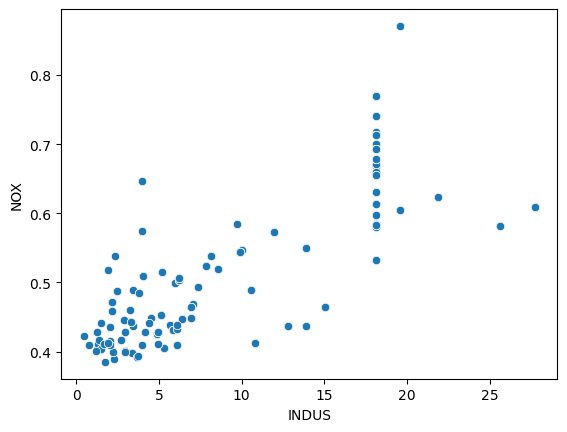

In [31]:
axax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
ax.set_title("Relation between NO concentration & proportion of non-retail business acres/town")
ax.set_xlabel("Proportion of non-retail business acres per town")
ax.set_ylabel("Nitric Oxide concentration")

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less then 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.



----

Using Regression analysis to find the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

stating the hypothesis:
* $H_0: β1$ = 0 (additional weighted distance to the five boston employment centres has no effect on median value of owner occupied homes)
* $H_1: β1$ is not equal to 0 (additional weighted distance to the five boston employment centres has an effect on median value of owner occupied homes)

In [38]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        14:23:29   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the p-value is more than the alpha (α) level = 0.05, so we accept the null hypothesis.



----